In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("C:/Users/ASUS/Downloads/appliance_energy.csv")
print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


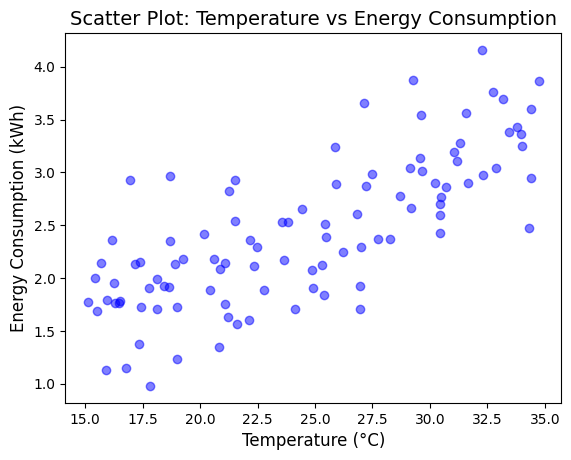

In [4]:
plt.scatter(df['Temperature (°C)'], df['Energy Consumption (kWh)'], color='blue', alpha=0.5)

# Add labels and title
plt.title("Scatter Plot: Temperature vs Energy Consumption", fontsize=14)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Energy Consumption (kWh)", fontsize=12)

plt.show()


In [5]:
#describe the data
df.describe()

,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


In [6]:
# Check for null values
print(df.isnull().sum())


Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [7]:
#split data into dependent and independent variables
X = df.drop('Energy Consumption (kWh)', axis=1)  # Features (independent variables)
y = df['Energy Consumption (kWh)']  # Target variable (dependent variable)

In [8]:
# prompt: xtrain ytrain xtest ytest

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
ytrain.head()

55    3.378030
88    3.756114
26    1.727990
42    2.140188
69    3.864685
Name: Energy Consumption (kWh), dtype: float64

In [10]:
xtest.head()

,Temperature (°C)
83,16.271167
53,32.896547
70,30.444895
45,28.250446
44,20.175600


In [11]:
ytest.head()

83    1.955394
53    3.037917
70    2.426014
45    2.370351
44    2.413076
Name: Energy Consumption (kWh), dtype: float64

In [13]:
#create a linear regression model

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [15]:
print("Slope: ",model.coef_)
print("Intercept: ",model.intercept_)

Slope:  [0.08996618]
Intercept:  0.22196391661907677


In [16]:
print(model.coef_*28.25 + model.intercept_)

[2.76350858]


In [19]:
y_pred = model.predict(xtest)
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [21]:
#Calculate MSE
mse = mean_squared_error(ytest,y_pred)
print("MSE",mse)
#Calculate R2 squared value
r2 = r2_score(ytest,y_pred)
print("R squared ",r2)

MSE 0.16342487842925052
R squared  0.6119478445218715


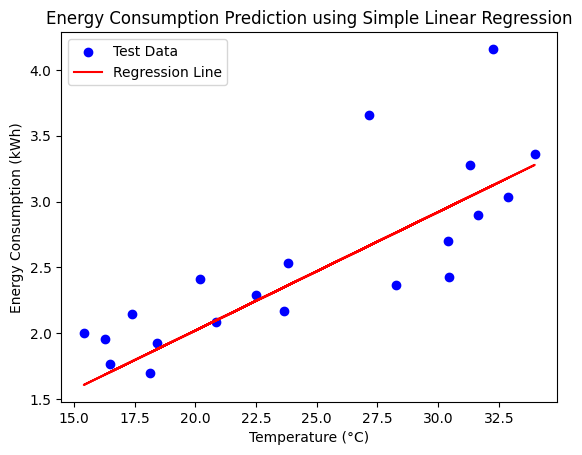

In [24]:
# Plot the test data and regression line
plt.scatter(xtest, ytest, color='blue', label='Test Data')  # Actual data
plt.plot(xtest, y_pred, color='red', label='Regression Line')  # Predicted data
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.title('Energy Consumption Prediction using Simple Linear Regression')
plt.show()

In [25]:
import joblib
#Save the model to a file
joblib.dump(model,'appliance_energy_model.pkl')

['appliance_energy_model.pkl']

In [26]:
import joblib
# Load the model from the file
model = joblib.load('appliance_energy_model.pkl')
# Example data for prediction
new_data = np.array([[22.49]])
# Make predictions
predictions = model.predict(new_data)
# Print the predictions
print(predictions)

[2.24530337]


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
